In [1]:
"""
hepatitis_csv :  https://www.kaggle.com/datasets/codebreaker619/hepatitis-data

About Dataset
Content

Data for Hepatitis symptoms and results in various people of both the genders of various age groups. Hepatitis symptoms include
fatigue, anorexia, big liver, etc.
"""

'\nhepatitis_csv :  https://www.kaggle.com/datasets/codebreaker619/hepatitis-data\n\nAbout Dataset\nContent\n\nData for Hepatitis symptoms and results in various people of both the genders of various age groups. Hepatitis symptoms include\nfatigue, anorexia, big liver, etc.\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt

import missingno as msno


%matplotlib inline

In [3]:
file_csv = "hepatitis_csv.csv"

df = pd.read_csv(file_csv)

In [4]:
df.shape

(155, 20)

In [5]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [6]:
for colname in list(df.columns):
    colnamestriped = colname.strip()
    df=df.rename(columns = {colname:colnamestriped})
    
    
    #'Malaria '
    #' Cirrhosis and other chronic liver diseases'

In [7]:
column_names = df.columns

list_column_names = list(column_names)

for colname in list_column_names:
    print(f" {list_column_names.index(colname)}  -> {colname}")

 0  -> age
 1  -> sex
 2  -> steroid
 3  -> antivirals
 4  -> fatigue
 5  -> malaise
 6  -> anorexia
 7  -> liver_big
 8  -> liver_firm
 9  -> spleen_palpable
 10  -> spiders
 11  -> ascites
 12  -> varices
 13  -> bilirubin
 14  -> alk_phosphate
 15  -> sgot
 16  -> albumin
 17  -> protime
 18  -> histology
 19  -> class


In [8]:
features = df.columns[:]
features = list(features)
features

['age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology',
 'class']

In [9]:
float_cols = [column for column in df.columns if df.dtypes[column] == 'float']

int_cols = [column for column in df.columns if df.dtypes[column] == 'int']


numeric_cols = [column for column in df.columns if (df.dtypes[column] == 'float') or (df.dtypes[column] == 'int')]

categorical_cols = [column for column in df.columns if df.dtypes[column] == 'object']

bool_cols = [column for column in df.columns if df.dtypes[column] == 'bool']

In [10]:
print(float_cols)

['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']


In [11]:
print(int_cols)

['age']


In [12]:
print(categorical_cols)

['sex', 'steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'class']


In [13]:
print(bool_cols)

['antivirals', 'histology']


In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(155, 20)

In [16]:
N_ROWS = df.shape[0]

N_COLS = df.shape[1]


In [17]:


df.drop_duplicates(subset=None, keep='first', inplace=True)
df.shape



(155, 20)

In [18]:
for fcol in float_cols:
    fcol_isna_sum = df[fcol].isna().sum()
    
    col_nan_percent = 100*(fcol_isna_sum/N_ROWS)
    
    col_nan_percent = round(col_nan_percent,2)
    
    
    print(f" \n\n  {fcol} .isna().sum()  =  {fcol_isna_sum}   =>    {col_nan_percent} % NaN  \n")
    print("___________________________________________")
    
    

 

  bilirubin .isna().sum()  =  6   =>    3.87 % NaN  

___________________________________________
 

  alk_phosphate .isna().sum()  =  29   =>    18.71 % NaN  

___________________________________________
 

  sgot .isna().sum()  =  4   =>    2.58 % NaN  

___________________________________________
 

  albumin .isna().sum()  =  16   =>    10.32 % NaN  

___________________________________________
 

  protime .isna().sum()  =  67   =>    43.23 % NaN  

___________________________________________


In [19]:
for bcol in bool_cols:
    print(f" \n\n  {bcol} \n ")
    print(df[bcol].value_counts(dropna=False))
    print("___________________________________________")

 

  antivirals 
 
False    131
True      24
Name: antivirals, dtype: int64
___________________________________________
 

  histology 
 
False    85
True     70
Name: histology, dtype: int64
___________________________________________


In [20]:
for categ in categorical_cols:
    print(f" \n\n  {categ} \n ")
    print(df[categ].value_counts(dropna=False))
    print("___________________________________________")

 

  sex 
 
female    139
male       16
Name: sex, dtype: int64
___________________________________________
 

  steroid 
 
True     78
False    76
NaN       1
Name: steroid, dtype: int64
___________________________________________
 

  fatigue 
 
True     100
False     54
NaN        1
Name: fatigue, dtype: int64
___________________________________________
 

  malaise 
 
False    93
True     61
NaN       1
Name: malaise, dtype: int64
___________________________________________
 

  anorexia 
 
False    122
True      32
NaN        1
Name: anorexia, dtype: int64
___________________________________________
 

  liver_big 
 
True     120
False     25
NaN       10
Name: liver_big, dtype: int64
___________________________________________
 

  liver_firm 
 
False    84
True     60
NaN      11
Name: liver_firm, dtype: int64
___________________________________________
 

  spleen_palpable 
 
False    120
True      30
NaN        5
Name: spleen_palpable, dtype: int64
____________________________

In [21]:
"""
fig = plt.figure(figsize=(25, 18))



fig.patch.set_facecolor('lightgrey')



yticks=np.arange(0,df.shape[0],5000)

plt.yticks(yticks)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray");

fig.suptitle('null cells distribution', fontsize=20)
plt.xlabel('columns indexes', fontsize=18)
plt.ylabel('entries indexes', fontsize=16)
"""

'\nfig = plt.figure(figsize=(25, 18))\n\n\n\nfig.patch.set_facecolor(\'lightgrey\')\n\n\n\nyticks=np.arange(0,df.shape[0],5000)\n\nplt.yticks(yticks)\nplt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray");\n\nfig.suptitle(\'null cells distribution\', fontsize=20)\nplt.xlabel(\'columns indexes\', fontsize=18)\nplt.ylabel(\'entries indexes\', fontsize=16)\n'

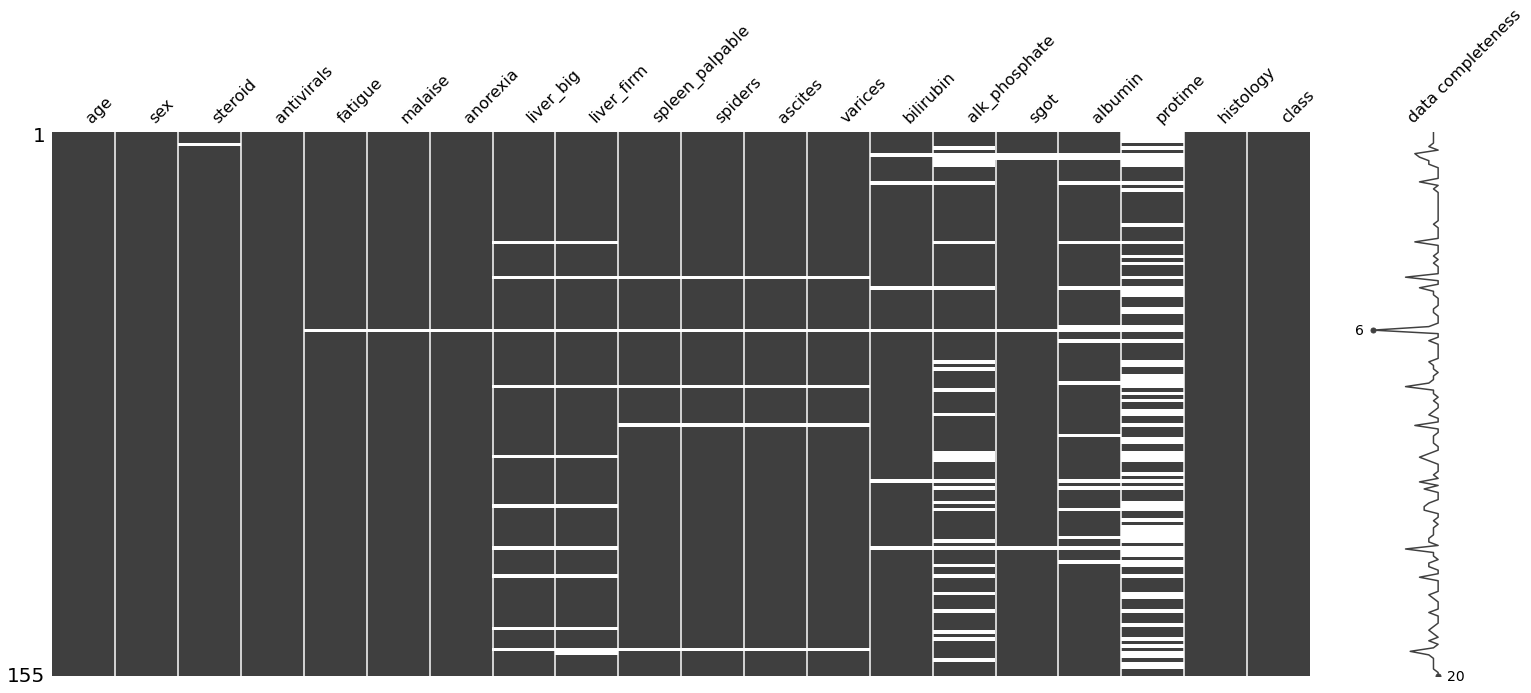

In [22]:

"""
df_left = df. iloc[:, 0:50]
df_right = df. iloc[:, 49:]
"""
msno.matrix(df, labels=True);



In [23]:
df.iloc[55:60,:]

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
55,37,female,False,False,True,True,True,True,False,False,False,False,False,0.8,92.0,59.0,NaN,NaN,False,live
56,34,female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,live
57,30,female,True,True,False,False,False,True,False,False,False,False,False,0.7,52.0,38.0,3.9,52.0,False,live
58,64,female,True,True,True,True,False,False,True,False,False,False,False,1.0,80.0,38.0,4.3,74.0,False,live
59,45,male,False,False,True,True,False,True,False,True,False,False,False,1.0,85.0,75.0,NaN,NaN,False,live


Text(0, 0.5, 'missing rate')

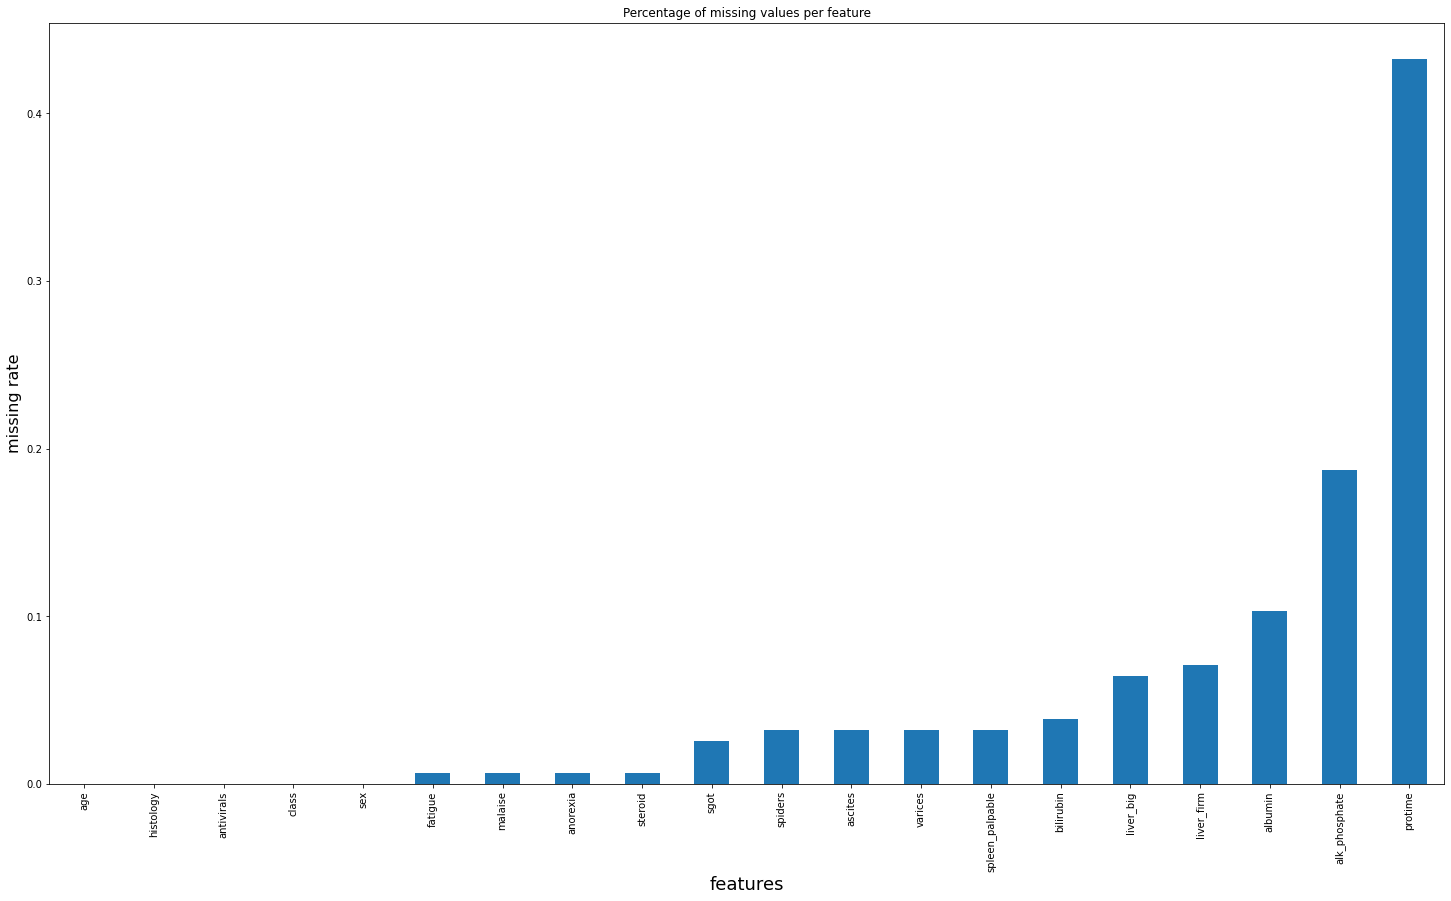

In [24]:
fig = df.isna().mean().sort_values().plot(
    kind="bar", figsize=(25, 14), title="Percentage of missing values per feature");

plt.xlabel('features', fontsize=18)
plt.ylabel('missing rate', fontsize=16)

In [25]:
pd.set_option('display.max_columns',None)

In [26]:
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [27]:
df.tail(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
145,31,female,False,False,True,False,False,True,False,False,False,False,False,1.2,75.0,173.0,4.2,54.0,True,live
146,41,female,True,False,True,False,False,True,True,True,True,False,True,4.2,65.0,120.0,3.4,NaN,True,die
147,70,female,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,True,die
148,20,female,False,False,False,False,False,True,NaN,False,False,False,False,0.9,89.0,152.0,4.0,NaN,True,live
149,36,female,True,False,False,False,False,True,False,False,False,False,False,0.6,120.0,30.0,4.0,NaN,True,live
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live
154,43,female,True,False,True,False,False,True,False,True,True,True,False,1.2,100.0,19.0,3.1,42.0,True,die


In [28]:
df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [30]:
df.isna().sum().sum()

167

In [31]:
min_max_mean = df.describe().loc[['min', 'max', 'mean']]

min_max_mean

,age,bilirubin,alk_phosphate,sgot,albumin,protime
min,7.0,0.300000,26.000000,14.00000,2.100000,0.000000
max,78.0,8.000000,295.000000,648.00000,6.400000,100.000000
mean,41.2,1.427517,105.325397,85.89404,3.817266,61.852273


In [32]:
df.describe(include = 'all')

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
count,155.000000,155,154,155,154,154,154,145,144,150,150,150,150,149.000000,126.000000,151.00000,139.000000,88.000000,155,155
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,female,True,False,True,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,live
freq,NaN,139,78,131,100,93,122,120,84,120,99,130,132,NaN,NaN,NaN,NaN,NaN,85,123
mean,41.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427517,105.325397,85.89404,3.817266,61.852273,NaN,NaN
std,12.565878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.212149,51.508109,89.65089,0.651523,22.875244,NaN,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,26.000000,14.00000,2.100000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,74.250000,31.50000,3.400000,46.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,85.000000,58.00000,4.000000,61.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,132.250000,100.50000,4.200000,76.250000,NaN,NaN


SyntaxError: invalid syntax (2868912103.py, line 1)

In [ ]:
#print(df["Country Name"].value_counts())

In [ ]:
print(df["Unnamed: 32"].value_counts())

In [ ]:
df.drop(columns=["Unnamed: 32"], axis=1, inplace=True)

In [ ]:
#drop_col_list = [1,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,21,22,24,25,26,27,28,29,30,31]

In [ ]:
#df.drop(df.columns[drop_col_list], axis=1, inplace=True)

In [ ]:
pathologies = df.columns[1:]
pathologies

In [ ]:
pathologies = list(pathologies)
pathologies

In [ ]:
df['__All causes__'] = df.sum(axis=1, numeric_only=True)
df

In [ ]:
#df.loc['index_of_world']= df.sum() # not integer
#df.loc[999]= df.sum() # pandas positional indexers are out-of-bounds
df.loc[191]= df.sum()
df

In [ ]:
df.loc[df.index[-1], 'Country Name'] = '__World__'
df

In [ ]:
columns_to_calculate =df.columns[1:]

for column in columns_to_calculate:
        
    df[f'{column} %'] = (df[column] / df['__All causes__']) * 100

df.drop(columns=["__All causes__ %"], axis=1, inplace=True)

In [ ]:
df

In [ ]:
last_row = df.iloc[-1]
#print(last_row)
for column in columns_to_calculate:    
    if not column.endswith("%"):        
        #print("column ", column)
        df[f'{column}_world_pc'] = (df[f"{column}"] / last_row[f"{column}"]) * 100

In [ ]:
df

In [ ]:
list_series = [df[seriename] for seriename in colnames]

In [ ]:
myzip = zip(colnames, list_series)

In [ ]:
listmyzip = list(myzip)

In [ ]:
df_from_dict = pd.DataFrame.from_dict(mydict)
df_from_dict

In [ ]:
columns_to_calculate =df_from_dict.columns[1:]
print(columns_to_calculate)

print(type(columns_to_calculate[2]))

In [ ]:
df_from_dict

In [ ]:
print(type(df_from_dict))

In [ ]:
df_from_dict

In [ ]:
malaria_view = df_from_dict[["Country Name","Malaria","Malaria %","Malaria_world_pc","__All causes__","__All causes___world_pc"]]
malaria_view

In [ ]:
malaria_view.loc[(malaria_view['Malaria'] > 32000) & (malaria_view['Malaria_world_pc'] > 1.0)]

In [ ]:
index_malaria_countries = [120,119, 46,75,41,30]
df_from_dict.iloc[index_malaria_countries]

In [ ]:
df_from_dict.loc[(df_from_dict["Country Name"] == "China")]

In [ ]:
#pd.set_option('display.max_rows',None)
#df_from_dict["Country Name"]
#pd.reset_option("display")

In [ ]:
df_from_dict.loc[(df_from_dict["Country Name"] == "United States")]

In [ ]:
df_from_dict.loc[(df_from_dict["Country Name"] == "Botswana")]

In [ ]:
df.loc[(df["Country Name"] == "Botswana")]

In [ ]:
df_only_percent = df_from_dict.copy()
df_only_percent.drop(columns=pathologies, axis=1, inplace=True)

df_only_percent.drop(191, axis=0, inplace=True) # __World__ will give describe max = 100%
df_only_percent       

In [ ]:
#df.dtypes

In [ ]:
#df.info()

In [ ]:
min_max_mean = df_only_percent.describe().loc[['min', 'max', 'mean']]

min_max_mean

In [ ]:
most_malaria = df_from_dict['Malaria'].nlargest(n=5)

In [ ]:
most_malaria.index

In [ ]:
countries_most_malaria_index = most_malaria.index[1:]

In [ ]:
list_countries_most_malaria_index = list(countries_most_malaria_index)

In [ ]:
df_from_dict.iloc[list_countries_most_malaria_index,[0,19,20,21]]

In [ ]:
#for disease_percent_name in national_diseases_percent_colnames:
#    print(disease_percent_name)

In [ ]:
five_big = df_from_dict['__All causes__'].nlargest(n=5)
print(five_big)

In [ ]:
countries_and_national_diseases = ["Country Name"] + national_diseases_percent_colnames

In [ ]:
five_big_countries_patho = df_from_dict.loc[five_big.index, countries_and_national_diseases]


In [ ]:
five_little = df_from_dict['__All causes__'].nsmallest(n=5)

five_little

In [ ]:
five_little_countries_patho = df_from_dict.loc[five_little.index, countries_and_national_diseases]

In [ ]:
five_big_five_little_true = pd.concat([five_big_countries_patho, five_little_countries_patho], ignore_index=True)

five_big_five_little_true

In [ ]:
five_big_five_little_false = pd.concat([five_big_countries_patho, five_little_countries_patho], ignore_index=False)
five_big_five_little_false

In [ ]:
five_big_five_little_false

In [ ]:
europkillers_with_countryname = ["Country Name"] + europkillers
print(europkillers_with_countryname)

In [ ]:
myselection = df_from_dict[df_from_dict["Country Name"].isin(thoses_countries)]

In [ ]:
myselection[europkillers_with_countryname]

In [ ]:
print(myselection[europkillers_with_countryname].to_dict())

In [ ]:
myselection.set_index('Country Name', inplace=True)

In [ ]:
myselection[europkillers]

In [ ]:
df_for_pie = myselection[europkillers_pc].copy()
df_for_pie

In [ ]:
df_for_pie['significative'] = df_for_pie.sum(axis=1, numeric_only=True)
df_for_pie

In [ ]:
df_for_pie["other"] = 100 - df_for_pie["significative"]

In [ ]:
df_for_pie.drop(columns=["significative"], axis=1, inplace=True)
df_for_pie

In [ ]:
df_for_pie_to_dict = df_for_pie.T.to_dict()

In [ ]:
#df_for_pie_to_dict

In [ ]:
#national_diseases_percent_colnames

In [ ]:
nigeriarow = df_from_dict.loc[(df_from_dict["Country Name"] == "Nigeria")]
nigeriarow[national_diseases_percent_colnames]

In [ ]:
nigeria_pc_valflatlist  = nigeriarow[national_diseases_percent_colnames].values.flatten().tolist()

In [ ]:
afghanistanrow = df_from_dict.loc[(df_from_dict["Country Name"] == "Afghanistan")]
afghanistanrow[national_diseases_percent_colnames]

In [ ]:
afghanistan_pc_valflatlist  = afghanistanrow[national_diseases_percent_colnames].values.flatten().tolist()

In [ ]:
print(f" len(national_diseases_percent_colnames)  {len(national_diseases_percent_colnames)}  ")

In [ ]:
max_row_index = df_from_dict["HIV/AIDS %"].idxmax()

row_with_max_foo = df_from_dict.loc[max_row_index]

print(row_with_max_foo)

In [ ]:
max_foo_value = df_from_dict.at[max_row_index, "HIV/AIDS %"]

print(max_foo_value)

In [ ]:
russia_vs_ukraine = df_from_dict.loc[(df_from_dict['Country Name'] == "Russia") | (df_from_dict['Country Name'] == "Ukraine")]

In [ ]:
russia_vs_ukraine[national_diseases_percent_colnames]

In [ ]:
df_from_dict[0:191]

In [ ]:
horror_ten_serie = df_from_dict[0:191]['Conflict and terrorism_world_pc'].nlargest(n=10)
horror_ten_serie

In [ ]:
selected_horror_ten = df_from_dict.loc[horror_ten_serie.index, ["Country Name", "Conflict and terrorism","Conflict and terrorism %","Conflict and terrorism_world_pc"]]

selected_horror_ten

In [ ]:
df_from_dict["Alz / Park"] = round(df_from_dict["Alz / Park"],2) 

In [ ]:
df_from_dict[["Country Name", "Alzheimer's disease","Parkinson's disease","Alz / Park"]].head(15)

In [ ]:
df_from_dict[["Country Name", "Alzheimer's disease","Parkinson's disease","Alz / Park"]].tail(15)

In [ ]:
min_max_mean_AlzPark = df_from_dict[["Country Name", "Alzheimer's disease %","Parkinson's disease %","Alz / Park"]].describe().loc[['min', 'max', 'mean']]

min_max_mean_AlzPark

In [ ]:
min_max_mean_AlzPark = df_from_dict[["Country Name", "Alzheimer's disease %","Parkinson's disease %","Alz / Park"]].describe()

min_max_mean_AlzPark

In [ ]:
df_from_dict[["Alcohol use disorders","Drug use disorders"]].head(15)
df_from_dict[["Country Name", "Alcohol use disorders","Drug use disorders"]].tail(15)
df_from_dict["OH / Drug"] = df_from_dict["Alcohol use disorders"] / df_from_dict["Drug use disorders"]

In [ ]:
df_from_dict["OH / Drug"] = round(df_from_dict["OH / Drug"],3) 

In [ ]:
df_from_dict[["Country Name", "Alcohol use disorders %","Drug use disorders %","OH / Drug"]].head(15)

In [ ]:
df_from_dict[["Country Name", "Alcohol use disorders %","Drug use disorders %","OH / Drug"]].tail(15)

In [ ]:
min_max_mean_AlcDrug = df_from_dict[["Country Name", "Alcohol use disorders %","Drug use disorders %","OH / Drug"]].describe().loc[['min', 'max', 'mean']]
min_max_mean_AlcDrug

In [ ]:
hitox_lowdrink = df_from_dict.loc[(df_from_dict["OH / Drug"] < 0.09)]
hitox_lowdrink[["Country Name", "Alcohol use disorders %","Drug use disorders %","OH / Drug"]]

In [ ]:
df_from_dict["OH + Drug %"] = df_from_dict["Alcohol use disorders %"] + df_from_dict["Drug use disorders %"]

df_from_dict["OH / Drug %"] = round(df_from_dict["OH / Drug"],2) 

In [ ]:
df_from_dict[["Country Name", "Alcohol use disorders %","Drug use disorders %","OH / Drug", "OH + Drug %"]].head(15)

In [ ]:
df_from_dict[["Country Name", "Alcohol use disorders %","Drug use disorders %","OH / Drug", "OH + Drug %"]].tail(15)

In [ ]:
hidrug_lowdrink = df_from_dict.loc[(df_from_dict["OH / Drug"] < 0.09)]
hidrug_lowdrink[["Country Name", "Alcohol use disorders %","Drug use disorders %","OH / Drug"]]

In [ ]:
min_max_mean_psychoabuse = df_from_dict[["Country Name", "OH + Drug %"]].describe().loc[['min', 'max', 'mean']]
min_max_mean_psychoabuse

In [ ]:
high_psycho_abuse = df_from_dict.loc[(df_from_dict["OH + Drug %"] > 3.167)]
high_psycho_abuse[["Country Name", "Alcohol use disorders %","Drug use disorders %","OH / Drug", "OH + Drug %"]]

In [ ]:
df_from_dict["OH + Drug %"].describe()

In [ ]:
q1 = df_from_dict["OH + Drug %"].describe()[4]
q4 = df_from_dict["OH + Drug %"].describe()[6]

df_from_dict['OH_and_Drug_level'] = df_from_dict.apply(lambda row: 'low' if row["OH + Drug %"] <= q1 else ('high' if row["OH + Drug %"] > q4 else 'medium'), axis = 1)

In [ ]:
df_from_dict[["Country Name",'OH_and_Drug_level']].head(20)

In [ ]:
tableau_toxlevels_aggressiv = df_from_dict.groupby(['OH_and_Drug_level'])[['Interpersonal violence %', 'Self-harm %']].mean()

tableau_toxlevels_aggressiv

In [ ]:
tab_t = tableau_toxlevels_aggressiv.T[["low", "medium", "high"]]
tab_t

In [ ]:
tableau_toxlevels_aggressiv_sorted = tab_t.T
tableau_toxlevels_aggressiv_sorted

In [ ]:
tableau_toxlevels_neuro = df_from_dict.groupby(['OH_and_Drug_level'])[["Alzheimer's disease %","Parkinson's disease %","Alz / Park"]].mean()

tab_t = tableau_toxlevels_neuro.T[["low", "medium", "high"]]

tableau_toxlevels_neuro_sorted = tab_t.T
tableau_toxlevels_neuro_sorted

In [ ]:
#for i,feature in enumerate(df_from_dict.columns):
#    print(i," ", feature)

In [ ]:
max_row_index = df_from_dict["Road injuries %"].idxmax()

row_with_max_foo = df_from_dict.loc[max_row_index]

In [ ]:
print(row_with_max_foo[["Country Name","Road injuries","Road injuries %","Road injuries_world_pc","__All causes__","OH_and_Drug_level"]])

In [ ]:
framed = row_with_max_foo[["Country Name","Road injuries","Road injuries %","Road injuries_world_pc","__All causes__","OH_and_Drug_level"]].to_frame()
print(framed)


In [ ]:
print(framed.T)


In [ ]:
print(row_with_max_foo[["Country Name","Road injuries","Road injuries %","Road injuries_world_pc","__All causes__","OH_and_Drug_level"]].transpose())

In [ ]:
max_row_index = df_from_dict["Road injuries"].idxmax()

row_with_max_foo = df_from_dict.loc[max_row_index]

print(row_with_max_foo)

In [ ]:
#checks zeros in road , annotate outliers